Welcome to Week 3!

We will be focussing in Particle Physics Analysis and detecting matter/antimatter assymetries in the production of certain types of particles.


![LHCb detector](https://www1b.physik.rwth-aachen.de/~schael/LHCb_files/LHCB%20PREVIEW-white-bg.jpg)

The data we are using comes from LHCb - one of the experiments at LHC. It is a highly specialised detector aimed at detecting decays involving the B-quark. Unlike the other major experiments, LHCb detects particles very close to the source and looks almost exclusively in the forward direction - this gives the detector many advantages compared to other experiments at LHC.

In order to get started, we need to access the [ROOT framework](https://root.cern.ch/) through a python package for that - [upROOT](https://pypi.org/project/uproot/) and download some datafiles into your environment!.

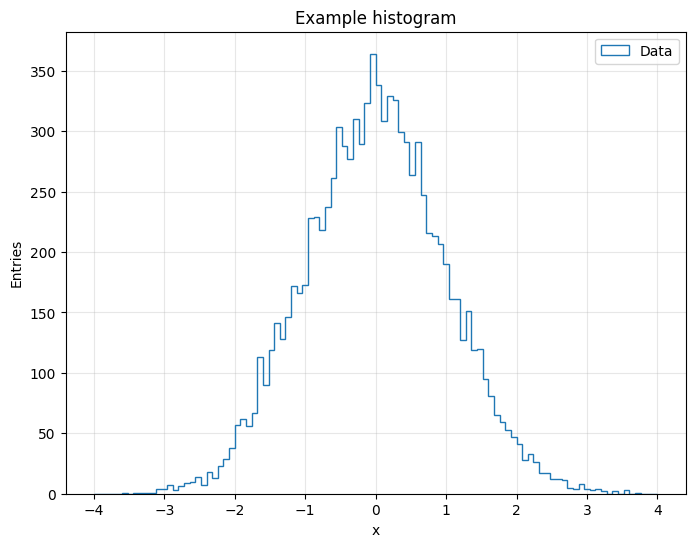

In [1]:
# We use NumPy for numerical work and random numbers
# Matplotlib is used for plotting as before
import numpy as np
import matplotlib.pyplot as plt

# SciPy provides fitting tools, similar to ROOT's Fit("gaus")
from scipy.stats import norm


# ------------------------------------------------------------
# 1. Generate Gaussian-distributed random numbers
#    (equivalent to h.FillRandom("gaus"))
# ------------------------------------------------------------

# Mean (mu) and standard deviation (sigma) of the Gaussian
mu = 0.0
sigma = 1.0

# Number of entries to generate (like number of fills)
n_entries = 10000

# Generate random data
data = np.random.normal(loc=mu, scale=sigma, size=n_entries)


# ------------------------------------------------------------
# 2. Create a histogram (We will do this alot today...))
# ------------------------------------------------------------

# Histogram settings - choose your own
n_bins = 100
x_min, x_max = -4, 4

# Create the figure and axes
fig, ax = plt.subplots(figsize=(8, 6))


counts, bin_edges, _ = ax.hist(
    data,
    bins=n_bins,
    range=(x_min, x_max),
    histtype="step",
    label="Data"
)


# ------------------------------------------------------------
# 3. Labels, title, and final touches
# ------------------------------------------------------------

ax.set_title("Example histogram")
ax.set_xlabel("x")
ax.set_ylabel("Entries")

ax.legend()
ax.grid(alpha=0.3)

# Display the plot
plt.show()



All being well - this should give no errors and we should have some kind of Gaussian distribution above.

We now want to do two things, install uproot - and get our data file from the CERN open data storage location.

This will probably be ratelimited very quickly, so you can find it on Canvas here: https://canvas.maastrichtuniversity.nl/courses/26553/files/6101104?module_item_id=1009080

Then upload it directly.

In [2]:
!pip install uproot


[notice] A new release of pip is available: 24.0 -> 26.0.1
[notice] To update, run: C:\Users\lukas\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
!mkdir LHCb_Data && cd LHCb_Data && wget http://opendata.cern.ch/record/4900/files/B2HHH_MagnetDown.root

A subdirectory or file LHCb_Data already exists.


In [4]:
import uproot

# Open the ROOT file
file = uproot.open("B2HHH_MagnetDown.root")

# List contents (shows us what is inside)
file.keys()

# Access the tree
tree = file["DecayTree"]

# Read one branch as a NumPy array
px = tree["H1_PX"].array(library="np")

px

array([  375.2842054 , -4985.13078543, -1265.45654435, ...,
        2606.91083928,  -294.71098895,   499.04234923], shape=(5135823,))

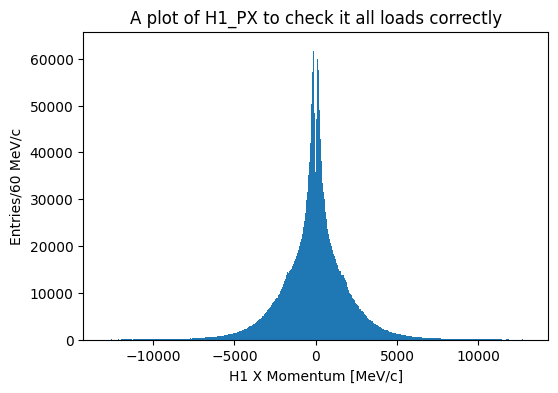

In [5]:
# now our data is an array - we can plot it :)

plt.figure(figsize=(6, 4))


#play with the variables below ...
plt.hist(
    px,
    bins=1000,
    range=(-13000, 13000),
    histtype="bar"
)

#Add some labels...

plt.xlabel("H1 X Momentum [MeV/c]")
plt.ylabel("Entries/60 MeV/c")
plt.title("A plot of H1_PX to check it all loads correctly")

plt.show()

This is the point at which the setup is all working - you can proceed below if you want to look at a basic guide to fitting functions to data using numpy etc.

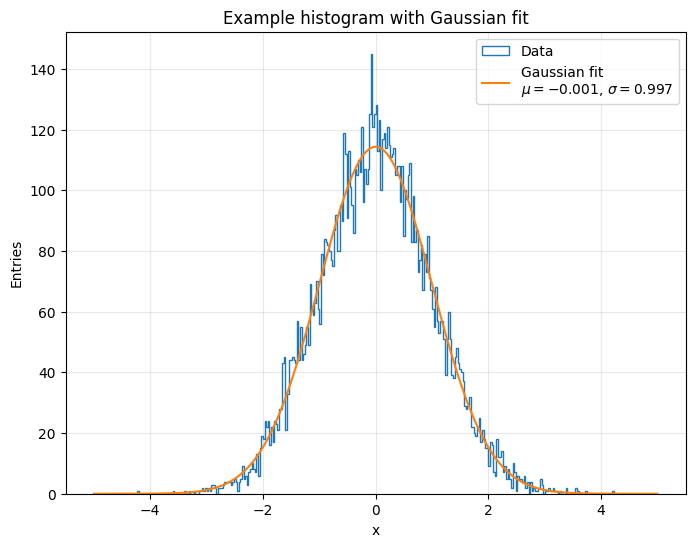

In [6]:
# Histogram settings - choose your own
n_bins = 350
x_min, x_max = (-5, 5 )

# Create the figure and axes
fig, ax = plt.subplots(figsize=(8, 6))


counts, bin_edges, _ = ax.hist(
    data,
    bins=n_bins,
    range=(x_min, x_max),
    histtype="step",
    label="Data"
)

# ------------------------------------------------------------
# Now we perform a Gaussian fit
# ------------------------------------------------------------

# Fit a normal distribution to the data
# norm.fit returns the fitted mean and standard deviation
fit_mu, fit_sigma = norm.fit(data)

# Create x values for drawing the fitted function
x = np.linspace(x_min, x_max, 400)

# Evaluate the fitted Gaussian probability density function
pdf = norm.pdf(x, fit_mu, fit_sigma)

# Convert PDF to expected histogram counts
# (ROOT does this internally; here we scale manually)
bin_width = (x_max - x_min) / n_bins
fit_y = pdf * n_entries * bin_width


# ------------------------------------------------------------
# Draw the fitted Gaussian on top of the histogram
# ------------------------------------------------------------

ax.plot(
    x,
    fit_y,
    label=f"Gaussian fit\n$\mu={fit_mu:.3f}$, $\sigma={fit_sigma:.3f}$"
)


# ------------------------------------------------------------
# abels, title, and final touches
# ------------------------------------------------------------

ax.set_title("Example histogram with Gaussian fit")
ax.set_xlabel("x")
ax.set_ylabel("Entries")

ax.legend()
ax.grid(alpha=0.3)

# Display the plot (equivalent to c.Draw())
plt.show()


## If you are **Here** - and Chris did not make the introduction yet - it's time for a coffee - take a break and wait for instructions about how to proceed.

#Why are we here?

This week is about finding out something about one of the fundemental questions in physics. Why do we have "stuff".

According to many of our models, and according to many measurements in particle physics, matter and anti-matter appear to be produced in equal quantities.

However, when one looks at the Universe in general, we have more matter than anti-matter left - so there need to be some processes where anti-matter and matter are not produced equally. You can find out more about the Matter/Anti-Matter Asymmetry [here](http://press.web.cern.ch/backgrounders/matterantimatter-asymmetry)

One place we look for this asymmetry is in [charge-partity (CP) violation](https://www.symmetrymagazine.org/article/october-2005/explain-it-in-60-seconds) in particle physics processes. This essentially says that the processes that happen in the anti-particle version of a decay do not **exactly** match to the processes that happen in the particle version of the decay.



---



At LHCb, we produce both particle of the  B<sup>+</sup> meson and it's antiparticle the B<sup>-</sup> meson.

We cannot detect these mesons directly. They decay into other things before we have a chance to measure them properly. So we collect data on the decay products, often called daughter particles. There are 524 [documented](http://pdg.lbl.gov/2014/listings/rpp2014-list-B-plus-minus.pdf) ways that the B<sup>+/-</sup> decays into various combinations. In order to simplify the process, we choose decay combinations that are convenient or have particular properties.

In this analysis, we will take the process:-

B<sup>+</sup>->K<sup>+</sup> + K<sup>+</sup>  + K<sup>-</sup>

or

B<sup>-</sup>->K<sup>-</sup> + K<sup>-</sup>  + K<sup>+</sup>


To do so, we are given the following data for each event in our system:-

![alt text](https://raw.githubusercontent.com/lhcb/opendata-project/80d64a3796e593fc8f9b257e85f32ae2e54f131f/Images/Variables.png)

Here, H1 is the detected daughter particle (so a Kaon or a Pion), **not** the B-meson - the mother particle. Normally we would have to do some reconstruction from the decay products (the Daughters) to the Mother to be able to make some conclusions.

Let's get started with working with this data:

For our analysis, the momentum of each of the daughter particles is split into the three cartesian components. We have combined these into a variable called H1_Ptot

In [37]:
#Using Uproot, load your data file and load the variables you think are useful for this analysis - I recommend learning what your data structure is...so plotting and calculations become easier later.
import uproot
import numpy as np
import matplotlib.pyplot as plt

# Open the ROOT file
file = uproot.open("B2HHH_MagnetDown.root")

# List contents (shows us what is inside)
file.keys()

# Access the tree
tree = file["DecayTree"]
#print(tree.keys())

# Read branches as a NumPy arrays
px_1 = tree["H1_PX"].array(library="np")
px_2 = tree["H2_PX"].array(library="np")
px_3 = tree["H3_PX"].array(library="np")

py_1 = tree["H1_PY"].array(library="np")
py_2 = tree["H2_PY"].array(library="np")
py_3 = tree["H3_PY"].array(library="np")

pz_1 = tree["H1_PZ"].array(library="np")
pz_2 = tree["H2_PZ"].array(library="np")
pz_3 = tree["H3_PZ"].array(library="np")


Px = px_1 + px_2 + px_3
Py = py_1 + py_2 + py_3
Pz = pz_1 + pz_2 + pz_3

def Magnitude (p1, p2, p3):
    Ptot= np.sqrt(p1**2 + p2**2 + p3**2)
    return Ptot

Ptot_1 = Magnitude (px_1, py_1, pz_1)
Ptot_2 = Magnitude (px_2, py_2, pz_2)
Ptot_3 = Magnitude (px_3, py_3, pz_3)

Ptot_B = Magnitude (Px, Py,  Pz)









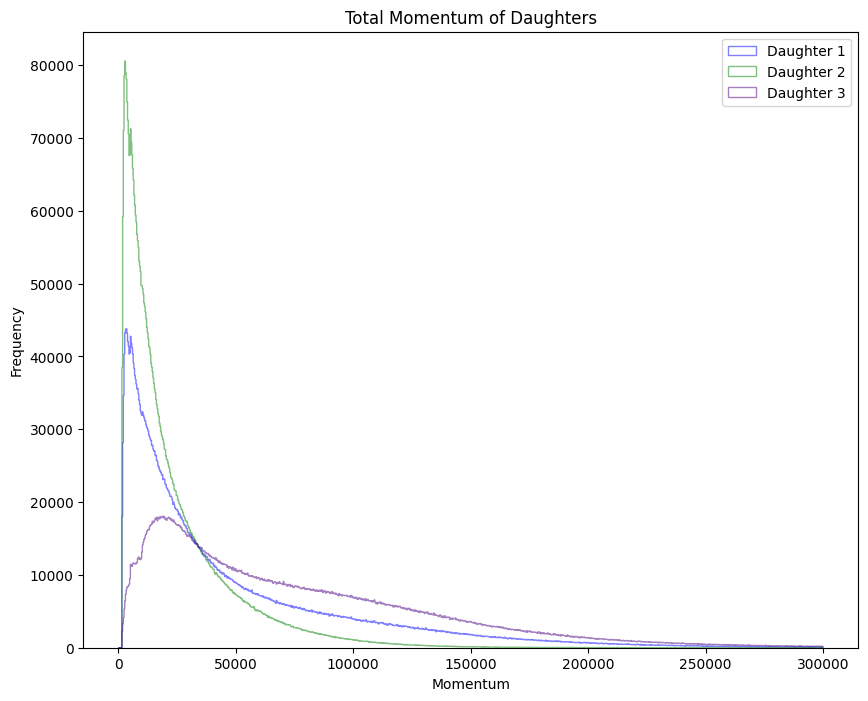

In [38]:
#Here, make a plot of the Total momentum of each of the three daughters on one plot
plt.figure(figsize=(10,8))

plt.hist(Ptot_1, bins=1000, range= (0, 300000), histtype= "step", alpha = 0.5, color="blue", label= "Daughter 1" )
plt.hist(Ptot_2, bins=1000, range= (0, 300000), histtype= "step", alpha = 0.5, color="green", label= "Daughter 2" )
plt.hist(Ptot_3, bins=1000, range= (0, 300000), histtype= "step", alpha = 0.5, color="indigo", label= "Daughter 3" )
plt.xlabel("Momentum")
plt.ylabel("Frequency")
plt.title("Total Momentum of Daughters")
plt.legend()
plt.show()


Now plot the total momentum for the mother (M_Ptot) this about how to calculate this from the information available

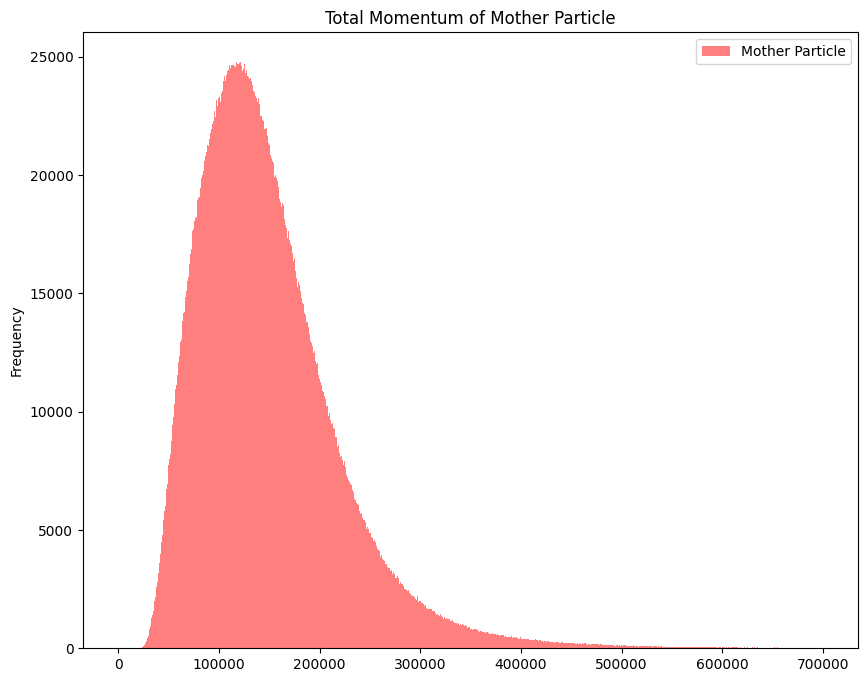

In [39]:
#use the histogram plotting tools, plot the momentum of the mother
plt.figure(figsize=(10,8))
plt.hist(Ptot_B, bins=1000, range= (0, 700000), histtype= "bar", alpha = 0.5, color="red", label= "Mother Particle" )

plt.ylabel("Frequency")
plt.title("Total Momentum of Mother Particle")
plt.legend()
plt.show()


Let's take a look at the whole data file that is available to us by looking at one specific entry - for example the number 45th entry in your array...

In [40]:
# print the 45th entry from your arrays together with the variable name, maybe in a nice list or table.
import pandas as pd
entry_45 = tree.arrays(library="pd").iloc[44]
entry_45 = entry_45.reset_index() #Reset index to get variable names as a column
entry_45.columns = ["Variable", "Value"]
print(entry_45)

            Variable         Value
0   B_FlightDistance      5.333713
1       B_VertexChi2      6.083737
2              H1_PX  -1634.778091
3              H1_PY    838.662567
4              H1_PZ  15416.880380
5           H1_ProbK      0.002000
6          H1_ProbPi      0.949091
7          H1_Charge      1.000000
8          H1_IPChi2    312.784714
9          H1_isMuon      0.000000
10             H2_PX  -3456.159439
11             H2_PY   -328.792523
12             H2_PZ  21752.773752
13          H2_ProbK      0.003451
14         H2_ProbPi      0.923865
15         H2_Charge     -1.000000
16         H2_IPChi2    301.678913
17         H2_isMuon      0.000000
18             H3_PX  -2892.828671
19             H3_PY  -2105.696831
20             H3_PZ  52930.481698
21          H3_ProbK      0.968910
22         H3_ProbPi      0.083907
23         H3_Charge     -1.000000
24         H3_IPChi2    169.739449
25         H3_isMuon      0.000000


We have now completed the initial steps and begun to work through what we need to with the data. This is a perfect moment to take a coffee!

Having discovered all of the relevant information about our daughter particles, we need to combine the measurements about them into a single mother - which will be our B<sup>+</sup> or our B<sup>-</sup>

Having found our momentum and energy, we can use these quantities to find our experimental mass (not the theoretical mass as we have used for the reconstruction).

When we calculate this, we will get a distribution of masses. This is due to errors in the measurements made either by the detector, or in the experiment itself. We hope to have a reasonably narrow peak to work with, but, sometimes this is not possible.

Additionally there will be other particles in the detector - which means our daughters might have come from two or even three different processes. Events which don't come from the same process will give a higher or lower mass than we are looking for. This is typically called the *background* while events which come from our event of interest are called the *signal*

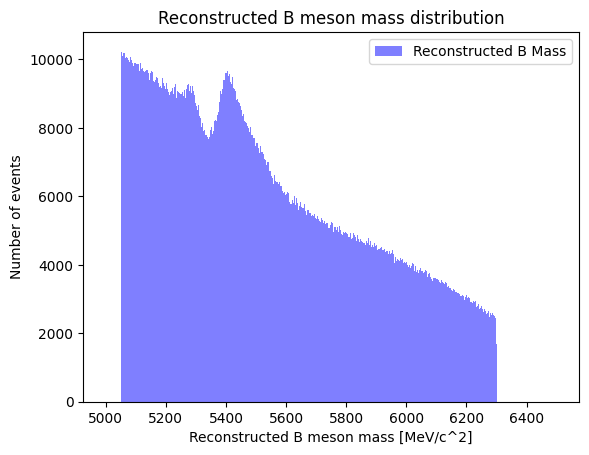

In [41]:
#First find the energy (you might have to do some physics thinking here)

m_daughters = 493.677  # Mass of the daughter particles (from book) [MeV/c^2]

# compute the energies of each daughter

E1 = np.sqrt(px_1**2 + py_1**2 + pz_1**2 + m_daughters**2)
E2 = np.sqrt(px_2**2 + py_2**2 + pz_2**2 + m_daughters**2)
E3 = np.sqrt(px_3**2 + py_3**2 + pz_3**2 + m_daughters**2)
Etot = E1 + E2 + E3 

# The using the total momentum find the reconstructed mass of the B
# Reconstruction of B meson invariant mass

mass_squared = Etot**2 - (Px**2 + Py**2 + Pz**2)
mass_B = np.sqrt(mass_squared)

#storing in an array

reconstructed_masses = mass_B

#Now plot a histogram of the range of masses of the B meson.

plt.hist(reconstructed_masses, bins=1000, range=(5000, 6500), histtype="bar", alpha=0.5, color="blue", label="Reconstructed B Mass")
plt.xlabel("Reconstructed B meson mass [MeV/c^2]")
plt.ylabel("Number of events")
plt.title("Reconstructed B meson mass distribution")
plt.legend()
plt.show()
#Does this match what we would expect from theory? no, we expect a peak around the known B meson mass (5279 MeV/c^2) but we see a broad distribution instead. This could be due to various factors such as detector resolution, background events, or incorrect reconstruction of the decay products.
#What are the features of your plot that you see?

We know that some of our particles are the B+ and some are the B- particle. There will also be some particles in our system that are not coming from a genuine B+/- or are a B+/- but are not constructed from Kaons.

We have some tools available to help:-

  *  During detection, software attributes the probability of a particle being a Kaon or a Pion (in the H1_ProbK or H1_ProbPi variable)
  * The detector also knows if the particle was a Muon - since it has detectors specifically for these. So it can attribute a 0 or a 1 to this probability
  * The reconstructed vertex has a some kind of quality associated with it (we call this the Vertex χ2 (this is the variable B_VertexChi2). This is the statistical measure that determines how well we found a single point to be the source of all three particles.



In order to get a better result, we should select our data to have the properties we desire and make some rules (often called a selection) to cut away data we don't want to include for various reasons. e.g. we know we don't have any muons in our decay - so any time H1/H2/H3 are a muon they should be excluded. The other variables are not so clear - so we can plot them to make a decision.

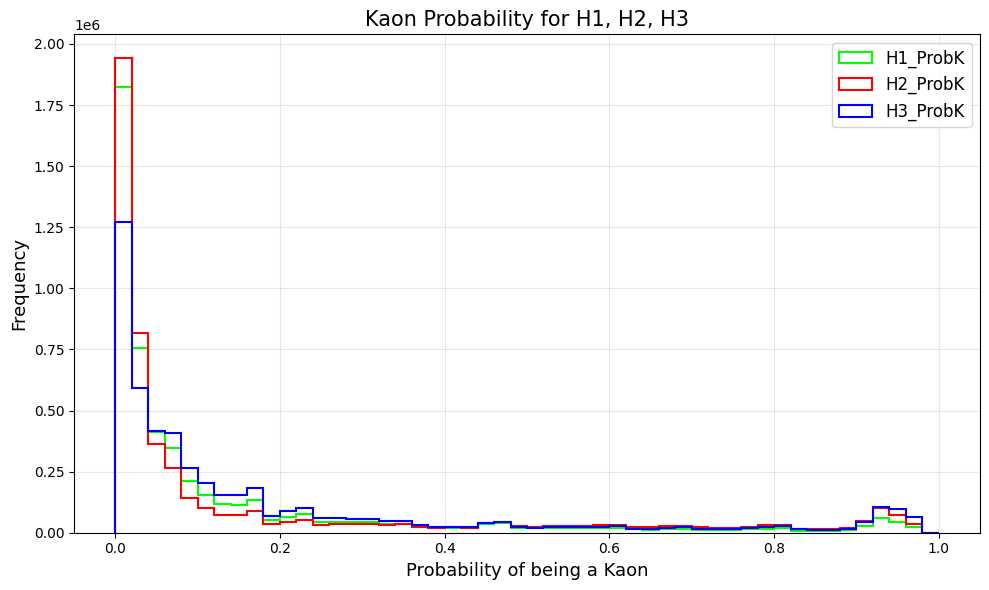

In [42]:
# Extract Kaon probability arrays for each track from the ROOT tree
probKH1 = tree["H1_ProbK"].array(library="np")
probKH2 = tree["H2_ProbK"].array(library="np")
probKH3 = tree["H3_ProbK"].array(library="np")

# Create figure with specified size
fig, ax = plt.subplots(figsize=(10, 6))

# Plot stepped histograms for each track, using distinct colours
ax.hist(probKH1, bins=50, range=(0, 1), histtype="step", color="lime",  linewidth=1.5, label='H1_ProbK')
ax.hist(probKH2, bins=50, range=(0, 1), histtype="step", color="red",   linewidth=1.5, label='H2_ProbK')
ax.hist(probKH3, bins=50, range=(0, 1), histtype="step", color="blue",  linewidth=1.5, label='H3_ProbK')

# Label axes and title
ax.set_xlabel('Probability of being a Kaon', fontsize=13)
ax.set_ylabel('Frequency', fontsize=13)
ax.set_title('Kaon Probability for H1, H2, H3', fontsize=15)

ax.legend(fontsize=12)
ax.grid(True, alpha=0.3)  # Subtle grid

plt.tight_layout()  # Prevent label clipping
plt.show()

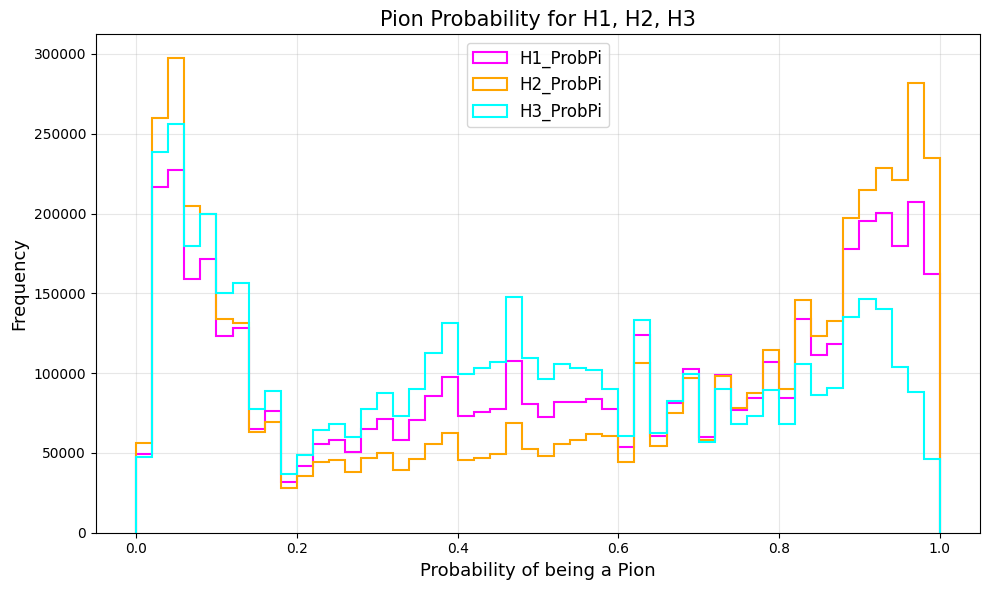

In [43]:
# Do the same for the Probability of being a Pion. 
# Extract Pion probability arrays for each track from the ROOT tree
probPiH1 = tree["H1_ProbPi"].array(library="np")
probPiH2 = tree["H2_ProbPi"].array(library="np")
probPiH3 = tree["H3_ProbPi"].array(library="np")

# Create figure with specified size
fig, ax = plt.subplots(figsize=(10, 6))

# Plot stepped histograms for each track, using distinct colours
ax.hist(probPiH1, bins=50, range=(0, 1), histtype="step", color="magenta", linewidth=1.5, label='H1_ProbPi')
ax.hist(probPiH2, bins=50, range=(0, 1), histtype="step", color="orange",  linewidth=1.5, label='H2_ProbPi')
ax.hist(probPiH3, bins=50, range=(0, 1), histtype="step", color="cyan",    linewidth=1.5, label='H3_ProbPi')

# Label axes and title
ax.set_xlabel('Probability of being a Pion', fontsize=13)
ax.set_ylabel('Frequency', fontsize=13)
ax.set_title('Pion Probability for H1, H2, H3', fontsize=15)

ax.legend(fontsize=12)
ax.grid(True, alpha=0.3)  # Subtle grid to aid readability

plt.tight_layout()  # Prevent label clipping
plt.show()

# Do these distributions match expectations? Yes, they do. H1 and H2 peak the most near 1, so are likely pions. H3 peaks near 0 and is likely a kaon. 

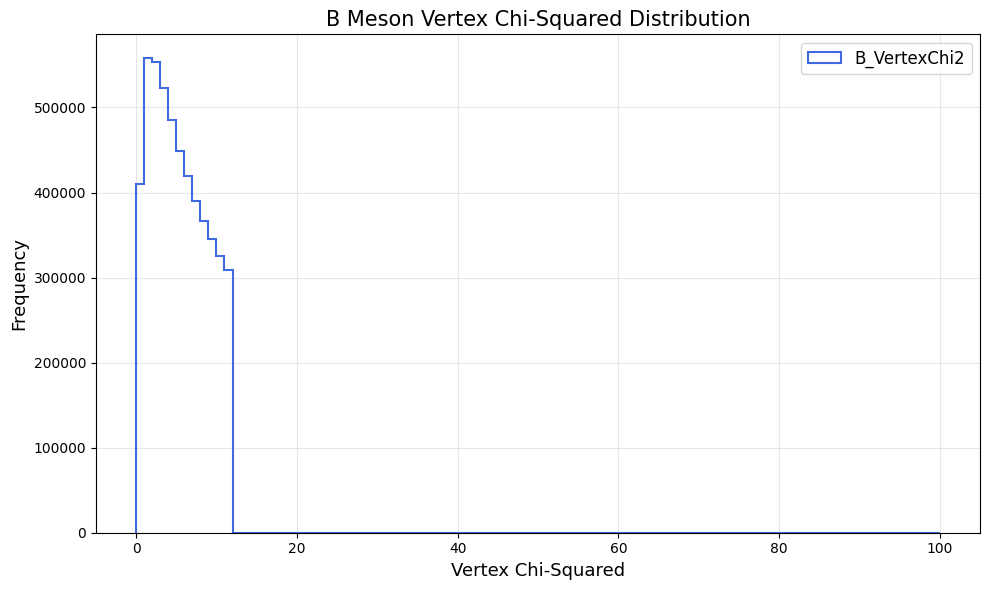

H1 ProbK  min/max: 0.000536113977432251 0.9813852906227112
H1 ProbPi min/max: 0.00841832160949707 0.9977284669876099


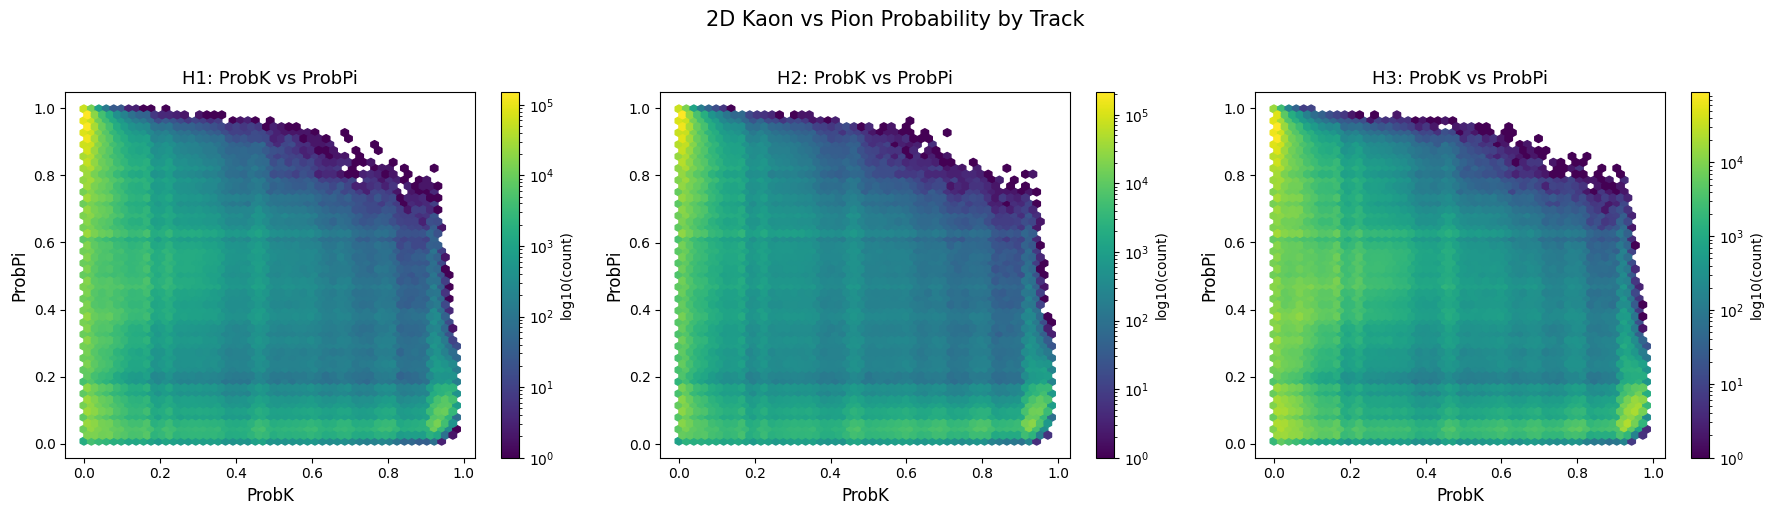

In [44]:
#For all our particles, make a plot of the B_VertexChi2

# Extract the B meson vertex chi-squared from the tree
# How well the 3 daughter tracks converge to a single vertex...
# A good/real B decay should have a low chi-squared value
B_VertexChi2 = tree["B_VertexChi2"].array(library="np")

# Create figure
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the chi-squared distribution as a stepped histogram
ax.hist(B_VertexChi2, bins=100, range=(0, 100), histtype="step", color="royalblue", linewidth=1.5, label='B_VertexChi2')

# Label axes and title
ax.set_xlabel('Vertex Chi-Squared', fontsize=13)
ax.set_ylabel('Frequency', fontsize=13)
ax.set_title('B Meson Vertex Chi-Squared Distribution', fontsize=15)

ax.legend(fontsize=12)
ax.grid(True, alpha=0.3)  # Subtle grid 

plt.tight_layout()
plt.show()

#Feeling ambitious? Maybe make a 2d plot of Kaon and Pion Prob in a 2 dimensional analysis?
# -->2D density plot of ProbK vs ProbPi for each of the three daughter tracks
# Expecting two clusters:
#   - Pion-like tracks (H1, H2): cluster near (ProbK≈0, ProbPi≈1)
#   - Kaon-like track  (H3): cluster near (ProbK≈1, ProbPi≈0)

# Filter out unphysical sentinel values (-1000) introduced by LHCb software
# when PID could not be computed for a track — these are not real probabilities
def clean(arr):
    return arr[arr > -999]

# Apply the filter to all ProbK and ProbPi arrays
probKH1_clean  = clean(probKH1)
probKH2_clean  = clean(probKH2)
probKH3_clean  = clean(probKH3)
probPiH1_clean = clean(probPiH1)
probPiH2_clean = clean(probPiH2)
probPiH3_clean = clean(probPiH3)

# Check the cleaned min/max to confirm -1000 values are gone
print("H1 ProbK  min/max:", probKH1_clean.min(),  probKH1_clean.max())
print("H1 ProbPi min/max:", probPiH1_clean.min(), probPiH1_clean.max())



# Draw 3 subplots, one per track

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Use cleaned arrays — sentinel values removed
tracks = [
    (probKH1_clean,  probPiH1_clean,  "H1", "magenta"),
    (probKH2_clean,  probPiH2_clean,  "H2", "orange"),
    (probKH3_clean,  probPiH3_clean,  "H3", "cyan"),
]

for ax, (probK, probPi, label, color) in zip(axes, tracks):
    # hexbin density plot — sensible now that -1000 outliers are removed
    hb = ax.hexbin(probK, probPi, gridsize=50, cmap="viridis", bins="log")
    fig.colorbar(hb, ax=ax, label="log10(count)")

    ax.set_xlabel("ProbK", fontsize=12)
    ax.set_ylabel("ProbPi", fontsize=12)
    ax.set_title(f"{label}: ProbK vs ProbPi", fontsize=13)

plt.suptitle("2D Kaon vs Pion Probability by Track", fontsize=15, y=1.02)
plt.tight_layout()
plt.show()



Using these plots, we can now make a preselection string. This is a text string that looks like

In [45]:
#This example is for each daughter particle to have a Probability of being a Pion being more than 90% and H1 to not be a muon
# Preselection string based on the distributions above.

# Reasoning for each cut:
#   H3_ProbK > 0.5 — H3 was clearly kaon-like in both the 1D and 2D PID plots.
#   H1_ProbPi > 0.5 — H1 was pion-like.
#   H2_ProbPi > 0.5 — H2 was also pion-like.
#   !H1_isMuon — reject muon-tagged tracks, we expect pions not muons
#   !H2_isMuon — same for H2
#   !H3_isMuon — same for H3
#   B_VertexChi2 < 10 — from the chi-squared plot, most good vertices are below ~10; cutting here removes poorly reconstructed B candidates

selection = (
    "H3_ProbK>0.5&"
    "H1_ProbPi>0.5&"
    "H2_ProbPi>0.5&"
    "!H1_isMuon&"
    "!H2_isMuon&"
    "!H3_isMuon&"
    "B_VertexChi2<10"
)

# Check how many events we started with and how many survive the selection
total = len(tree["B_VertexChi2"].array(library="np"))
survived = len(tree["B_VertexChi2"].array(library="np")[
    tree["B_VertexChi2"].array(library="np") < 10
])

print(f"Total entries before selection : {total}")
print(f"Entries after VertexChi2 cut   : {survived}")
print(f"Fraction retained              : {survived/total:.2%}")
selection=("H1_ProbPi>0.9&H2_ProbPi>0.9&H3_ProbPi>0.9&!H1_isMuon&H2_isElectron&H3_isElephant")

Total entries before selection : 5135823
Entries after VertexChi2 cut   : 4501287
Fraction retained              : 87.64%


In [46]:
# The VertexChi2 < 10 cut is motivated by the plot — the majority of real decays lie below this value, and the long tail above is likely background
# Data which has been cut should not however be used to reconstruct the B mass, as this introduces bias into the signal

Events before cuts : 5135823
Events after cuts  : 181669
Fraction retained  : 3.54%


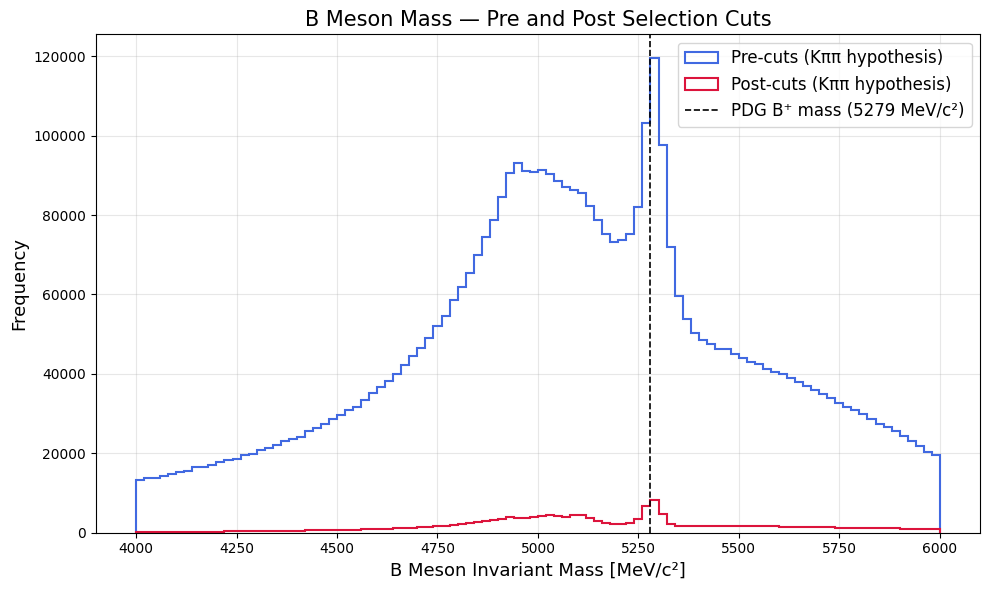

In [47]:
#Now as a good check, we should see the effect of applying our cuts.
#On one histogram, plot the B meson mass, from both the tree (pre-cuts) and the CutTree (post-cuts)
#What do you notice about your histogram now?

# We have reconstructed_masses from earlier cells but assuming all daughters are kaons
# Recompute the B mass with the CORRECT mass assignments:
# H1 -> pion (139.570 MeV/c^2)
# H2 -> pion (139.570 MeV/c^2)
# H3 -> kaon (493.677 MeV/c^2)
# This is motivated by the PID plots which showed H3 is kaon-like and H1/H2 are pion-like

# Read PID and vertex quality variables needed to build the selection mask
H3_ProbK     = tree["H3_ProbK"].array(library="np")
H1_ProbPi    = tree["H1_ProbPi"].array(library="np")
H2_ProbPi    = tree["H2_ProbPi"].array(library="np")
H1_isMuon    = tree["H1_isMuon"].array(library="np")
H2_isMuon    = tree["H2_isMuon"].array(library="np")
H3_isMuon    = tree["H3_isMuon"].array(library="np")
B_VertexChi2 = tree["B_VertexChi2"].array(library="np")

# Rebuild the preselection mask — same cuts as defined earlier
mask = (
    (H3_ProbK    > 0.5) &   # H3 is kaon-like
    (H1_ProbPi   > 0.5) &   # H1 is pion-like
    (H2_ProbPi   > 0.5) &   # H2 is pion-like
    (H1_isMuon  == 0)   &   # reject muon-tagged tracks
    (H2_isMuon  == 0)   &
    (H3_isMuon  == 0)   &
    (B_VertexChi2 < 10)     # good vertex quality
)

KAON_MASS = 493.677  # MeV/c^2
PION_MASS = 139.570  # MeV/c^2

# Recompute energies with correct mass hypotheses per track
E_H1_corrected = np.sqrt(px_1**2 + py_1**2 + pz_1**2 + PION_MASS**2)
E_H2_corrected = np.sqrt(px_2**2 + py_2**2 + pz_2**2 + PION_MASS**2)
E_H3_corrected = np.sqrt(px_3**2 + py_3**2 + pz_3**2 + KAON_MASS**2)

# Sum 4-momenta to get corrected B meson energy
E_total_corrected = E_H1_corrected + E_H2_corrected + E_H3_corrected

# Recompute invariant mass with corrected mass assignments
mass_B_corrected = np.sqrt(E_total_corrected**2 - (Px**2 + Py**2 + Pz**2))

# Apply selection mask
mass_B_corrected_cut = mass_B_corrected[mask]

print(f"Events before cuts : {len(mass_B_corrected)}")
print(f"Events after cuts  : {len(mass_B_corrected_cut)}")
print(f"Fraction retained  : {len(mass_B_corrected_cut)/len(mass_B_corrected):.2%}")

# Plot pre- and post-cut distributions on the same figure for comparison
fig, ax = plt.subplots(figsize=(10, 6))

ax.hist(mass_B_corrected,     bins=100, range=(4000, 6000), histtype="step",
        color="royalblue", linewidth=1.5, label="Pre-cuts (Kππ hypothesis)")

ax.hist(mass_B_corrected_cut, bins=100, range=(4000, 6000), histtype="step",
        color="crimson",   linewidth=1.5, label="Post-cuts (Kππ hypothesis)")

# Reference line at the known PDG B+ meson mass
ax.axvline(x=5279, color="black", linestyle="--", linewidth=1.2, label="PDG B⁺ mass (5279 MeV/c²)")

ax.set_xlabel("B Meson Invariant Mass [MeV/c²]", fontsize=13)
ax.set_ylabel("Frequency", fontsize=13)
ax.set_title("B Meson Mass — Pre and Post Selection Cuts", fontsize=15)

ax.legend(fontsize=12)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

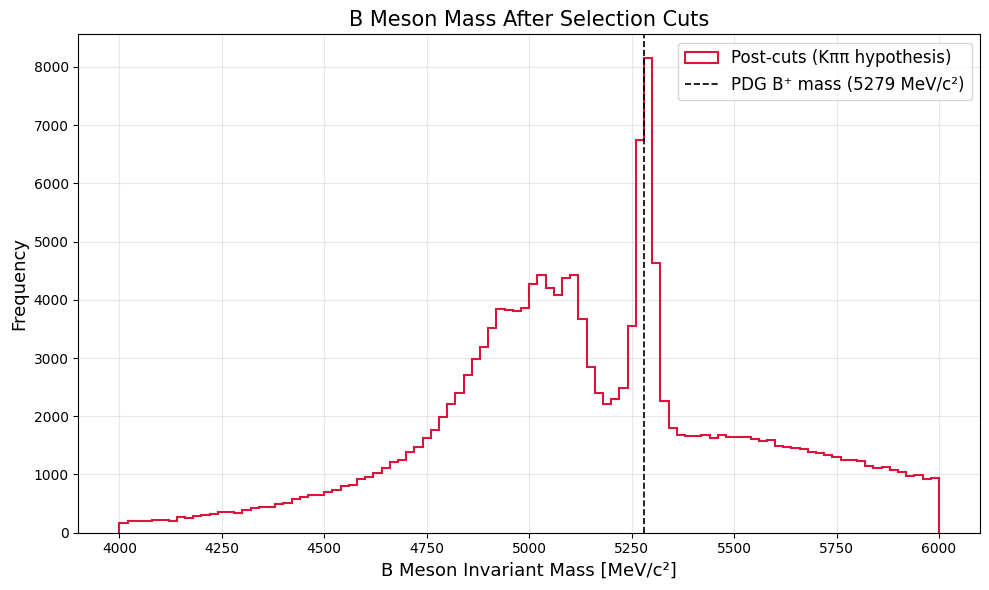

Mean  reconstructed mass : 5141.92 MeV/c²
Std   reconstructed mass : 482.03  MeV/c²
PDG   B⁺ mass            : 5279.00 MeV/c²
Difference from PDG      : 137.08 MeV/c²


In [48]:
#The fraction retained fell to a meagre 3.54% which is apalling.

#You can also plot your selected data alone - this shape probably looks quite alot different to your first distribution!

# Plot the post-cut B meson mass distribution alone
# This should look very different to the first broad distribution we saw —
# the background is now heavily suppressed and a clean signal peak should be visible

fig, ax = plt.subplots(figsize=(10, 6))

# Post-cut distribution only — signal should be clearly visible as a sharp peak
ax.hist(mass_B_corrected_cut, bins=100, range=(4000, 6000), histtype="step",
        color="crimson", linewidth=1.5, label="Post-cuts (Kππ hypothesis)")

# Reference line at the known PDG B+ meson mass (5279 MeV/c^2)
ax.axvline(x=5279, color="black", linestyle="--", linewidth=1.2, label="PDG B⁺ mass (5279 MeV/c²)")

ax.set_xlabel("B Meson Invariant Mass [MeV/c²]", fontsize=13)
ax.set_ylabel("Frequency", fontsize=13)
ax.set_title("B Meson Mass After Selection Cuts", fontsize=15)

ax.legend(fontsize=12)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print some basic statistics about the post-cut distribution
print(f"Mean  reconstructed mass : {mass_B_corrected_cut.mean():.2f} MeV/c²")
print(f"Std   reconstructed mass : {mass_B_corrected_cut.std():.2f}  MeV/c²")
print(f"PDG   B⁺ mass            : 5279.00 MeV/c²")
print(f"Difference from PDG      : {abs(mass_B_corrected_cut.mean() - 5279):.2f} MeV/c²")

#How do we count the number of events?

We now have a histogram of events that we have reconstructed as a B meson. But some of these events are caused by a co-incidence of events which would still occur if there were no B mesons actually produced. We call this the background. Background and signal are indistinguishable now as the detector cannot tell the difference and our cuts were unable to remove the events for physics reasons. We can do some statistical analysis, if we know the approximate shapes of our signal and our background. Just like a least-squares fitting we can run a fit routine to minimise the error between the fitted curve and our data. As an example, if we know our data has an exponential background and a gaussian signal:

![Gaussian+Exp Background](https://twiki.cern.ch/twiki/pub/RooStats/RooStatsTutorialsJune2013/GausExpModelFit.png)

Here the red line represents our signal, the blue dotted line is our background and the solid blue line is our combined curve. The graph also shows the number of signal events and the number of background events. The signal now is a tiny fraction of the total data shown in the plot.

In order to do this, we need to build a fit model, around which the software can try to fit our data.

We use RooFit for this, which includes:
* Gaussian
* Exponential
* Chebychev
* Crystal Ball
* Breit-Wigner

As well as several other choices.

Typically exponential and Chebychev functions are used for background and Gaussian, Crystal Ball and Breit-Wigner are used for signal. We can also combine them (e.g. 1 crystal ball, 1 gaussian, 1 exponential) in various ways.

In [53]:
# Probably handy to use a package like lmfit to help us with the models we might want to use, then use scipy to fit

!pip install lmfit

# check out its documentation for what shapes it can handle for you! https://pypi.org/project/lmfit/

# it can do the whole fitting story and output results too :)


[notice] A new release of pip is available: 24.0 -> 26.0.1
[notice] To update, run: C:\Users\lukas\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Events with loose cuts : 378868
[[Model]]
    Model(signal_plus_background)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 5369
    # data points      = 100
    # variables        = 5
    chi-square         = 88583.4670
    reduced chi-square = 932.457547
    Akaike info crit   = 688.653033
    Bayesian info crit = 701.678884
    R-squared          = 0.22705645
##  Warning: uncertainties could not be estimated:
    g_mean:     at boundary
    g_sigma:    at boundary
    exp_decay:  at boundary
[[Variables]]
    g_amp:      5783.86105 (init = 5000)
    g_mean:     5200.00000 (init = 5279)
    g_sigma:   100.0000000 (init = 20)
    exp_amp:    1873.29096 (init = 100000)
    exp_decay: -1.6128e-09 (init = -0.0005)

── Yield Estimates ──────────────────────
Signal yield     : 72490 events
Background yield : 187328 events
Purity           : 27.90%


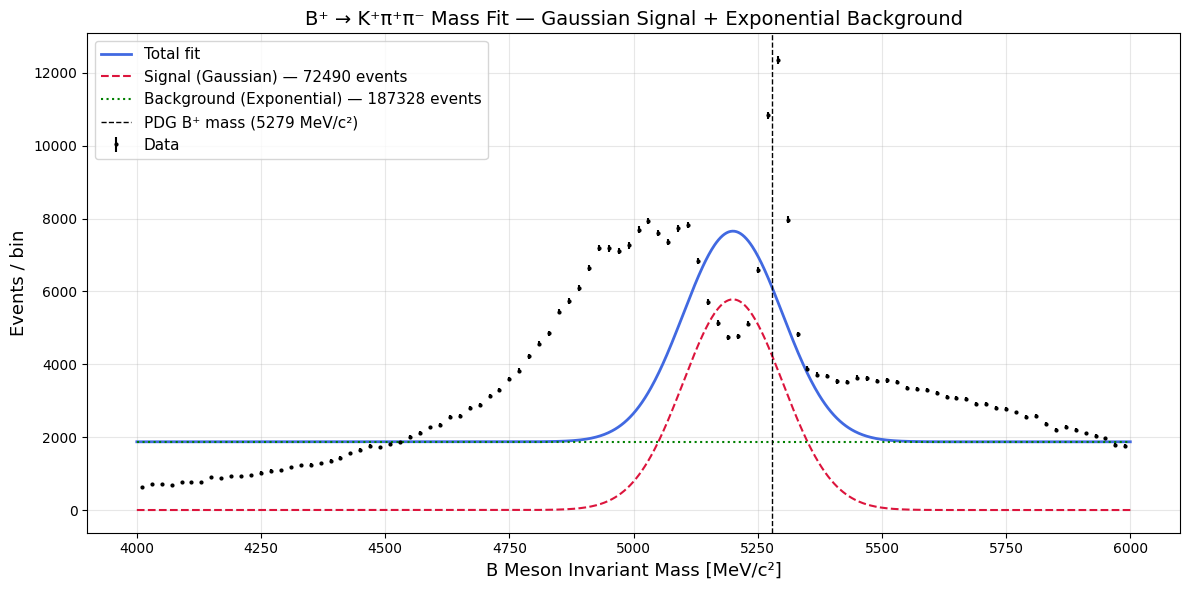

In [62]:
#use my example of creating a PDF (far far) above to do a fit to your data. Start with one component, think about making a number 2 component plot - so we have a part for the background and a part for the signal.

# if your cut is very strict above, you may actually get better results by being less strict, give yourself more data and more events to run through the fitting procedure.
# ->Relax the cuts slightly to give the fitter more data 
# ->looser cuts-->more events-->better fit stability
mask_loose = (
    (H3_ProbK    > 0.3) &   # relaxed from 0.5
    (H1_ProbPi   > 0.3) &   # relaxed from 0.5
    (H2_ProbPi   > 0.3) &   # relaxed from 0.5
    (H1_isMuon  == 0)   &
    (H2_isMuon  == 0)   &
    (H3_isMuon  == 0)   &
    (B_VertexChi2 < 10)
)

mass_loose = mass_B_corrected[mask_loose]
print(f"Events with loose cuts : {len(mass_loose)}")

#  Bin the data 
counts, bin_edges = np.histogram(mass_loose, bins=100, range=(4000, 6000))
bin_centres = 0.5 * (bin_edges[:-1] + bin_edges[1:])

# Only use bins with entries to avoid zero-division in weighting
mask_nonzero = counts > 0
x     = bin_centres[mask_nonzero]
y     = counts[mask_nonzero]
y_err = np.sqrt(y)  # Poisson uncertainty per bin

#  Define the two components 

def gaussian(x, g_amp, g_mean, g_sigma):
    """Signal component — Gaussian peak centred on B+ mass"""
    return g_amp * np.exp(-0.5 * ((x - g_mean) / g_sigma)**2)

def exponential(x, exp_amp, exp_decay):
    """Background component — falling exponential for combinatorial background"""
    return exp_amp * np.exp(exp_decay * x)

def signal_plus_background(x, g_amp, g_mean, g_sigma, exp_amp, exp_decay):
    """Combined 2-component model: Signal + Background"""
    return gaussian(x, g_amp, g_mean, g_sigma) + exponential(x, exp_amp, exp_decay)

#  Set up lmfit model and initial parameter guesses 
model  = Model(signal_plus_background)
params = Parameters()

# Signal parameters — centred on PDG B+ mass
params.add("g_amp",    value=5000,   min=0)
params.add("g_mean",   value=5279,   min=5200, max=5350)
params.add("g_sigma",  value=20,     min=1,    max=100)

# Background parameters
params.add("exp_amp",   value=1e5,   min=0)
params.add("exp_decay", value=-5e-4, max=0)   # negative = falling distribution

# 5. Run the fit 
result = model.fit(y, params, x=x, weights=1.0/y_err)
print(result.fit_report())

# Extract signal and background yields
p          = result.params
sig_yield  = np.sum(gaussian    (bin_centres, p["g_amp"],   p["g_mean"],   p["g_sigma"]))
bkg_yield  = np.sum(exponential (bin_centres, p["exp_amp"], p["exp_decay"]))

print(f"\n── Yield Estimates ──────────────────────")
print(f"Signal yield     : {sig_yield:.0f} events")
print(f"Background yield : {bkg_yield:.0f} events")
print(f"Purity           : {sig_yield / (sig_yield + bkg_yield):.2%}")

# Plot
fig, ax = plt.subplots(figsize=(12, 6))

# Data points with Poisson error bars
ax.errorbar(bin_centres, counts, yerr=np.sqrt(counts),
            fmt='k.', markersize=4, label='Data', zorder=5)

# Smooth x range for plotting the fitted curves
x_smooth = np.linspace(4000, 6000, 1000)

# Total fit
ax.plot(x_smooth,
        signal_plus_background(x_smooth, p["g_amp"], p["g_mean"], p["g_sigma"],
                                          p["exp_amp"], p["exp_decay"]),
        color="royalblue", linewidth=2, label="Total fit")

# Signal component alone
ax.plot(x_smooth,
        gaussian(x_smooth, p["g_amp"], p["g_mean"], p["g_sigma"]),
        color="crimson", linewidth=1.5, linestyle="--", label=f"Signal (Gaussian) — {sig_yield:.0f} events")

# Background component alone
ax.plot(x_smooth,
        exponential(x_smooth, p["exp_amp"], p["exp_decay"]),
        color="green", linewidth=1.5, linestyle=":", label=f"Background (Exponential) — {bkg_yield:.0f} events")

# PDG reference line
ax.axvline(x=5279, color="black", linestyle="--", linewidth=1, label="PDG B⁺ mass (5279 MeV/c²)")

ax.set_xlabel("B Meson Invariant Mass [MeV/c²]", fontsize=13)
ax.set_ylabel("Events / bin", fontsize=13)
ax.set_title("B⁺ → K⁺π⁺π⁻ Mass Fit — Gaussian Signal + Exponential Background", fontsize=14)
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


Using this structure, you can in theory build whatever models you like!

Some recommendations (but not necessary to do all):-



*   Gauss+Exponential (as above)
*   Crystal Ball + Exponential
*   Gauss+Crystal Ball+Exponential (now you need to weigh the two signal peaks and then the total signal against total background)
*   Gauss+Chebychev
*   Two Crystal Balls + Exponential

So how good was the fit, and how many events do you have?

You can use the signal shape, the bin widths and the quad from scipy.integrate function to "count" how many events lie under your signal peak,  not including the background events - this is what we actually want.

It will also return to you an error - check in the scipy documentation about what that actually means....

[[Model]]
    Model(signal_plus_background)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 12000
    # data points      = 100
    # variables        = 5
    chi-square         = 63397.8923
    reduced chi-square = 667.346235
    Akaike info crit   = 655.201571
    Bayesian info crit = 668.227422
    R-squared          = 0.16284937
##  Warning: uncertainties could not be estimated:
    g_mean:     at boundary
    g_sigma:    at boundary
[[Variables]]
    g_amp:      3283.95140 (init = 5000)
    g_mean:     5200.00000 (init = 5279)
    g_sigma:    99.9999925 (init = 20)
    exp_amp:    674.816318 (init = 100000)
    exp_decay: -2.8916e-08 (init = -0.0005)

── Signal Yield (from integration)
Signal events : 41158 ± 0


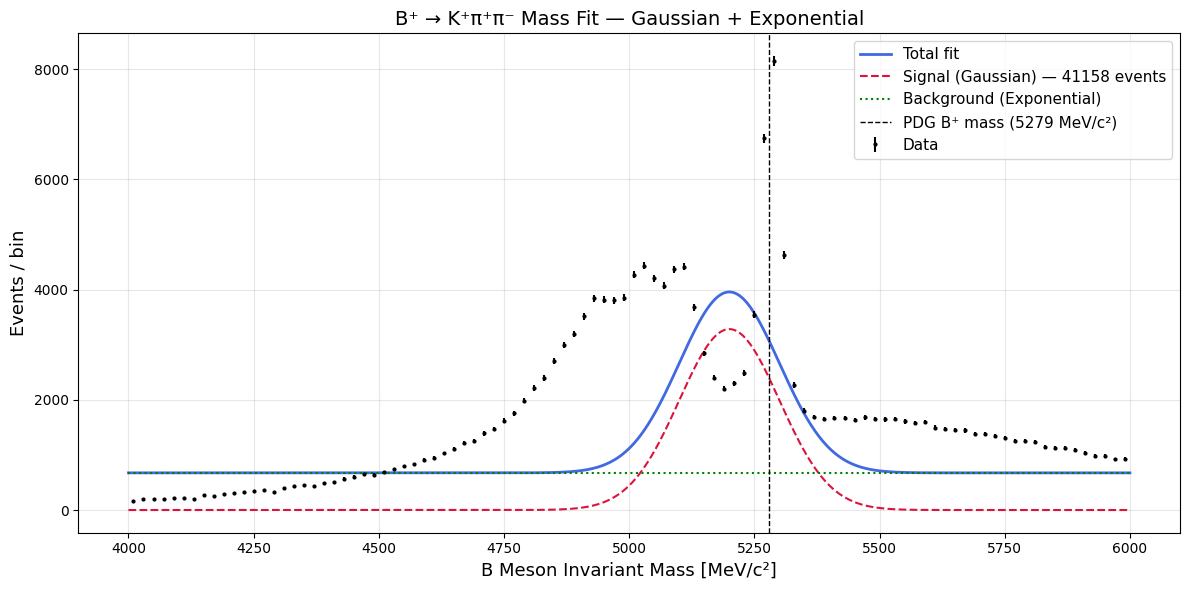

In [63]:
#find the area under your curve(s)! maybe make a pretty little table...

from lmfit import Model, Parameters
from scipy import integrate
# Bin the post-cut mass data
counts, bin_edges = np.histogram(mass_B_corrected_cut, bins=100, range=(4000, 6000))
bin_centres = 0.5 * (bin_edges[:-1] + bin_edges[1:])
bin_width   = bin_edges[1] - bin_edges[0]

mask_nonzero = counts > 0
x     = bin_centres[mask_nonzero]
y     = counts[mask_nonzero]
y_err = np.sqrt(y)  # Poisson uncertainty per bin

# Define model components 
def gaussian(x, g_amp, g_mean, g_sigma):
    """Signal — Gaussian peak centred near PDG B+ mass (5279 MeV/c²)"""
    return g_amp * np.exp(-0.5 * ((x - g_mean) / g_sigma)**2)

def exponential(x, exp_amp, exp_decay):
    """Background — falling exponential for combinatorial background"""
    return exp_amp * np.exp(exp_decay * x)

def signal_plus_background(x, g_amp, g_mean, g_sigma, exp_amp, exp_decay):
    """Combined 2-component model"""
    return gaussian(x, g_amp, g_mean, g_sigma) + exponential(x, exp_amp, exp_decay)

# Set up and run the fit 
model  = Model(signal_plus_background)
params = Parameters()

params.add("g_amp",     value=5000,   min=0)
params.add("g_mean",    value=5279,   min=5200, max=5350)
params.add("g_sigma",   value=20,     min=1,    max=100)
params.add("exp_amp",   value=1e5,    min=0)
params.add("exp_decay", value=-5e-4,  max=0)

result = model.fit(y, params, x=x, weights=1.0/y_err)
print(result.fit_report())

# Integrate under signal curve to count events 
# scipy.integrate.quad integrates the fitted signal function over the mass range
# Dividing by bin_width converts from histogram counts to number of events
p = result.params

signal_integral, signal_error = integrate.quad(
    gaussian, 4000, 6000,
    args=(p["g_amp"].value, p["g_mean"].value, p["g_sigma"].value)
)

# Convert integral to event count using bin width
signal_events = signal_integral / bin_width
signal_events_err = signal_error  / bin_width

print(f"\n── Signal Yield (from integration)")
print(f"Signal events : {signal_events:.0f} ± {signal_events_err:.0f}")

# Plot the fit 
fig, ax = plt.subplots(figsize=(12, 6))

ax.errorbar(bin_centres, counts, yerr=np.sqrt(counts),
            fmt='k.', markersize=4, label='Data', zorder=5)

x_smooth = np.linspace(4000, 6000, 1000)

ax.plot(x_smooth,
        signal_plus_background(x_smooth, p["g_amp"], p["g_mean"],
                                p["g_sigma"], p["exp_amp"], p["exp_decay"]),
        color="royalblue", linewidth=2, label="Total fit")

ax.plot(x_smooth,
        gaussian(x_smooth, p["g_amp"], p["g_mean"], p["g_sigma"]),
        color="crimson", linewidth=1.5, linestyle="--",
        label=f"Signal (Gaussian) — {signal_events:.0f} events")

ax.plot(x_smooth,
        exponential(x_smooth, p["exp_amp"], p["exp_decay"]),
        color="green", linewidth=1.5, linestyle=":",
        label="Background (Exponential)")

ax.axvline(x=5279, color="black", linestyle="--", linewidth=1,
           label="PDG B⁺ mass (5279 MeV/c²)")

ax.set_xlabel("B Meson Invariant Mass [MeV/c²]", fontsize=13)
ax.set_ylabel("Events / bin", fontsize=13)
ax.set_title("B⁺ → K⁺π⁺π⁻ Mass Fit — Gaussian + Exponential", fontsize=14)
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()



#Counting

So we have now loaded our data; we have reconstructed information about the mother B meson and we have cut away any data which looks like it might not be what we are looking for. We have then plotted histograms of the mass of the B meson and used this to fit a model, a function to describe the events there. We now have to identify which of our events belong to the B<sup>+</sup> and how many of them belong to B<sup>-</sup>.

To do this, should split out data into two groups (and throw away data which doesn't comply with either decay)

We will be looking for the events which are


B<sup>+</sup>->K<sup>+</sup> + K<sup>+</sup>  + K<sup>-</sup>

or

B<sup>-</sup>->K<sup>-</sup> + K<sup>-</sup>  + K<sup>+</sup>

We can look for the number of positive and negative charges in H1, H2 and H3 (using the variable ```H1_Charge``` etc.). If we have 0 or 3 positive charges, we should throw the event away and if we have 1 it should be assigned be a B<sup>-</sup>, with 2 it should be a B<sup>+</sup>

Once we have defined if it's a B<sup>+</sup> or a B <sup>-</sup>, we should go ahead and ensure the pre-selection is applied and then plot our B mass, and fit the model to find the yield.

We can then calculate the assymetry from this equation:

$A=\frac{(N^{B-}-N^{B+})}{(N^{B-}+N^{B+})}$

Where N<sup>B+/- </sup> is the number of events found from the fitted yield of the signal from each data set.

The uncertainty on this result is given by:

$\sigma_A=\sqrt\frac{1-A^2}{N^{B-}+N^{B+}}$

Calculate these two values for your data and print them below:

B+ candidates  : 92784
B- candidates  : 88885
Discarded      : 0


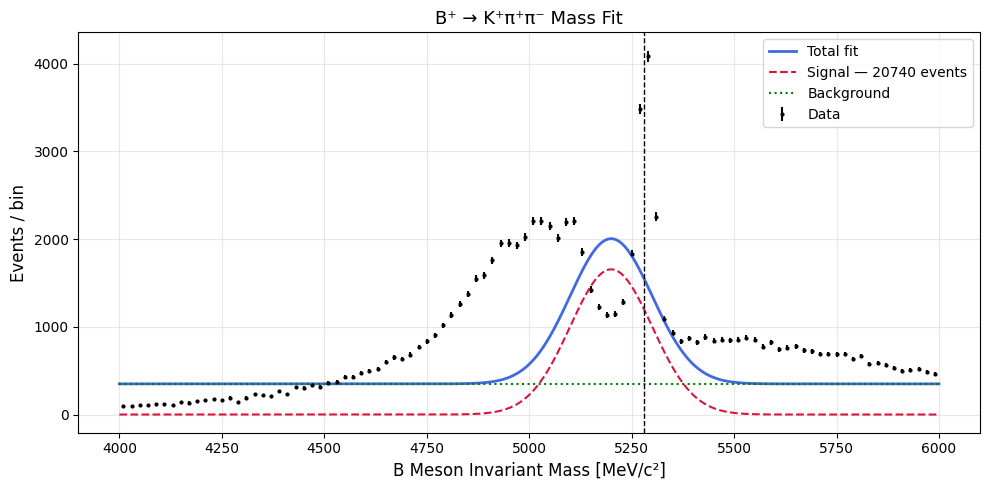

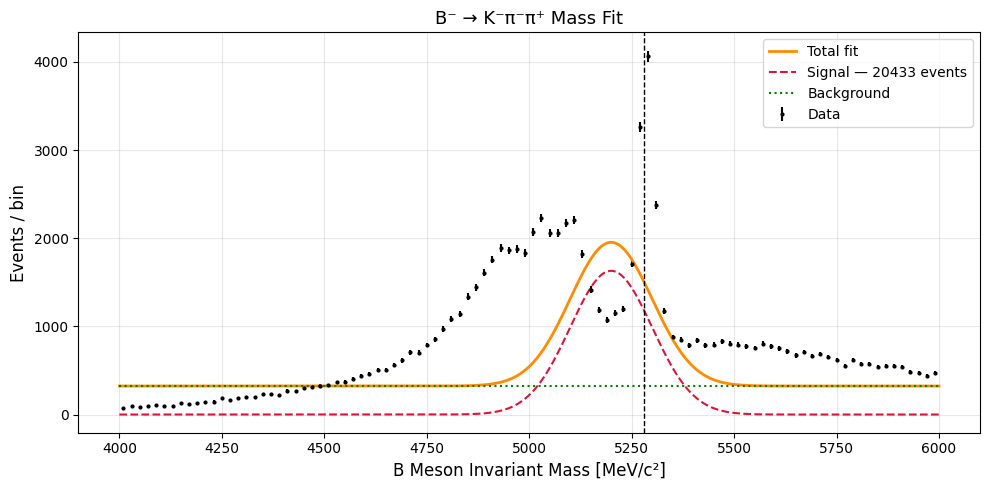


╔══════════════════════════════════════╗
║         FINAL RESULTS                ║
╠══════════════════════════════════════╣
║  N(B⁺)       :    20740 events      ║
║  N(B⁻)       :    20433 events      ║
║  Asymmetry A :  -0.0074               ║
║  Uncertainty :   0.0049               ║
╚══════════════════════════════════════╝

A = -0.0074 is consistent with zero within uncertainties.


In [64]:
#Here do your calculation of the final result
# Split into B+ and B- using track charges 
# Read the charge of each daughter track
H1_Charge = tree["H1_Charge"].array(library="np")
H2_Charge = tree["H2_Charge"].array(library="np")
H3_Charge = tree["H3_Charge"].array(library="np")

# Total charge of the three daughters--> B+ or B-
# B+ -> K+pi+pi-  total charge = +1  (2 positive, 1 negative)
# B- -> K-pi-pi+  total charge = -1  (1 positive, 2 negative)
# Discard events with total charge 0 or ±3 as these are unphysical
total_charge = H1_Charge + H2_Charge + H3_Charge

# Apply preselection mask first, then split by charge
Bplus_mask  = mask & (total_charge == 1)   # B+ candidates
Bminus_mask = mask & (total_charge == -1)  # B- candidates
discard     = mask & ~(np.abs(total_charge) == 1)

print(f"B+ candidates  : {np.sum(Bplus_mask)}")
print(f"B- candidates  : {np.sum(Bminus_mask)}")
print(f"Discarded      : {np.sum(discard)}")

# Fit B+ and B- mass distributions separately 
def fit_mass(mass_array, label, color):
    """Helper function to bin, fit, and return signal yield for a given sample"""
    counts, bin_edges = np.histogram(mass_array, bins=100, range=(4000, 6000))
    bin_centres = 0.5 * (bin_edges[:-1] + bin_edges[1:])
    bin_width   = bin_edges[1] - bin_edges[0]

    mask_nz = counts > 0
    x, y, y_err = bin_centres[mask_nz], counts[mask_nz], np.sqrt(counts[mask_nz])

    model  = Model(signal_plus_background)
    params = Parameters()
    params.add("g_amp",     value=2000,  min=0)
    params.add("g_mean",    value=5279,  min=5200, max=5350)
    params.add("g_sigma",   value=20,    min=1,    max=100)
    params.add("exp_amp",   value=1e4,   min=0)
    params.add("exp_decay", value=-5e-4, max=0)

    result = model.fit(y, params, x=x, weights=1.0/y_err)
    p      = result.params

    # Integrate signal component to get event yield
    integral, err = integrate.quad(
        gaussian, 4000, 6000,
        args=(p["g_amp"].value, p["g_mean"].value, p["g_sigma"].value)
    )
    n_signal = integral / bin_width

    # Plot
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.errorbar(bin_centres, counts, yerr=np.sqrt(counts),
                fmt='k.', markersize=4, label='Data')
    x_smooth = np.linspace(4000, 6000, 1000)
    ax.plot(x_smooth,
            signal_plus_background(x_smooth, p["g_amp"], p["g_mean"],
                                    p["g_sigma"], p["exp_amp"], p["exp_decay"]),
            color=color, linewidth=2, label="Total fit")
    ax.plot(x_smooth,
            gaussian(x_smooth, p["g_amp"], p["g_mean"], p["g_sigma"]),
            color="crimson", linewidth=1.5, linestyle="--",
            label=f"Signal — {n_signal:.0f} events")
    ax.plot(x_smooth,
            exponential(x_smooth, p["exp_amp"], p["exp_decay"]),
            color="green", linewidth=1.5, linestyle=":", label="Background")
    ax.axvline(x=5279, color="black", linestyle="--", linewidth=1)
    ax.set_xlabel("B Meson Invariant Mass [MeV/c²]", fontsize=12)
    ax.set_ylabel("Events / bin", fontsize=12)
    ax.set_title(f"{label} Mass Fit", fontsize=13)
    ax.legend(fontsize=10)
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    return n_signal

# Run fits for B+ and B- separately
N_Bplus  = fit_mass(mass_B_corrected[Bplus_mask],  "B⁺ → K⁺π⁺π⁻", "royalblue")
N_Bminus = fit_mass(mass_B_corrected[Bminus_mask], "B⁻ → K⁻π⁻π⁺", "darkorange")

# Calculate CP asymmetry
# A = (N_B- - N_B+) / (N_B- + N_B+)
# A non-zero value indicates CP violation — a difference between matter and antimatter
A       = (N_Bminus - N_Bplus) / (N_Bminus + N_Bplus)

# Uncertainty on A: sigma_A = sqrt((1 - A^2) / (N_B+ + N_B-))
sigma_A = np.sqrt((1 - A**2) / (N_Bplus + N_Bminus))

# Print final results as a table 
print("\n╔══════════════════════════════════════╗")
print("║         FINAL RESULTS                ║")
print("╠══════════════════════════════════════╣")
print(f"║  N(B⁺)       : {N_Bplus:>8.0f} events      ║")
print(f"║  N(B⁻)       : {N_Bminus:>8.0f} events      ║")
print(f"║  Asymmetry A : {A:>8.4f}               ║")
print(f"║  Uncertainty : {sigma_A:>8.4f}               ║")
print("╚══════════════════════════════════════╝")

# A value of A significantly different from 0 would indicate CP violation!
if abs(A) > 2 * sigma_A:
    print(f"\n⚠ A = {A:.4f} is more than 2σ from zero — possible CP violation signal!")
else:
    print(f"\nA = {A:.4f} is consistent with zero within uncertainties.")

#Congratulations!

You just made your first LHCb physics analysis. Does this seem like a reasonable result? Did we explain why we have an excess of mass in the Universe?

## **Bonus content only below here:**

To make a further anaysis, we can look into the intermediate processes.

We have so far considered only that the B meson ultimately decays into three kaons. It may be that on the way, the B meson first decays into a Kaon and another particle, and then from that particle to two Kaons.

We would expect this to be one of three possible modes (for B<sup>+</sup>):

$R^{++} \rightarrow K_1^+ +K_2^+$

(we don't expect this to happen because of the like charges in the Kaons)

$R^0 \rightarrow K_1^+ +K_3^-$

$R^0 \rightarrow K_2^+ +K_3^-$

(Expect symmetric arrangements for B<sup>-</sup>)

To analyse the intermediate states we can measure the invarient masses of the intermediate states and then plot them on what is called a Dalitz plot (this is a 2D plot with two different two body decays (from the three body decay) on each axis)

![Dalitz Plot](https://slideplayer.com/slide/15960097/88/images/15/Dalitz+plot%3A+%CE%9B+c+%2B+%E2%86%92%F0%9D%91%9D+%F0%9D%90%BE+%E2%88%92+%F0%9D%9C%8B+%2B.jpg)


In [67]:
#Define a function to find the invariant mass of two given Kaons

# The invariant mass of two particles is found using the 4-momentum sum:
# M^2 = (E1 + E2)^2 - (p1 + p2)^2

def invariant_mass_2body(px1, py1, pz1, px2, py2, pz2, mass1, mass2):
    """
    Compute the invariant mass of two particles given their momenta and masses.
    Uses the relation M^2 = E^2 - |p|^2 for the combined 4-momentum.
    """
    # Compute individual energies from momenta and known masses
    E1 = np.sqrt(px1**2 + py1**2 + pz1**2 + mass1**2)
    E2 = np.sqrt(px2**2 + py2**2 + pz2**2 + mass2**2)

    # Sum the 4-momenta
    E_tot  = E1 + E2
    px_tot = px1 + px2
    py_tot = py1 + py2
    pz_tot = pz1 + pz2

    # Invariant mass from the combined 4-momentum
    M2 = E_tot**2 - (px_tot**2 + py_tot**2 + pz_tot**2)
    return np.sqrt(np.abs(M2))  # abs protects against small negative rounding errors

KAON_MASS = 493.677  # MeV/c^2

# Compute the three possible 2-body invariant masses from the three daughters
# Each represents a possible intermediate state (e.g. phi, K*, rho)
M_12 = invariant_mass_2body(px_1, py_1, pz_1, px_2, py_2, pz_2, KAON_MASS, KAON_MASS)
M_13 = invariant_mass_2body(px_1, py_1, pz_1, px_3, py_3, pz_3, KAON_MASS, KAON_MASS)
M_23 = invariant_mass_2body(px_2, py_2, pz_2, px_3, py_3, pz_3, KAON_MASS, KAON_MASS)

print("2-body invariant mass ranges:")
print(f"  M(H1,H2) : {M_12[mask].min():.0f} — {M_12[mask].max():.0f} MeV/c²")
print(f"  M(H1,H3) : {M_13[mask].min():.0f} — {M_13[mask].max():.0f} MeV/c²")
print(f"  M(H2,H3) : {M_23[mask].min():.0f} — {M_23[mask].max():.0f} MeV/c²")

2-body invariant mass ranges:
  M(H1,H2) : 987 — 5755 MeV/c²
  M(H1,H3) : 989 — 5787 MeV/c²
  M(H2,H3) : 988 — 5783 MeV/c²


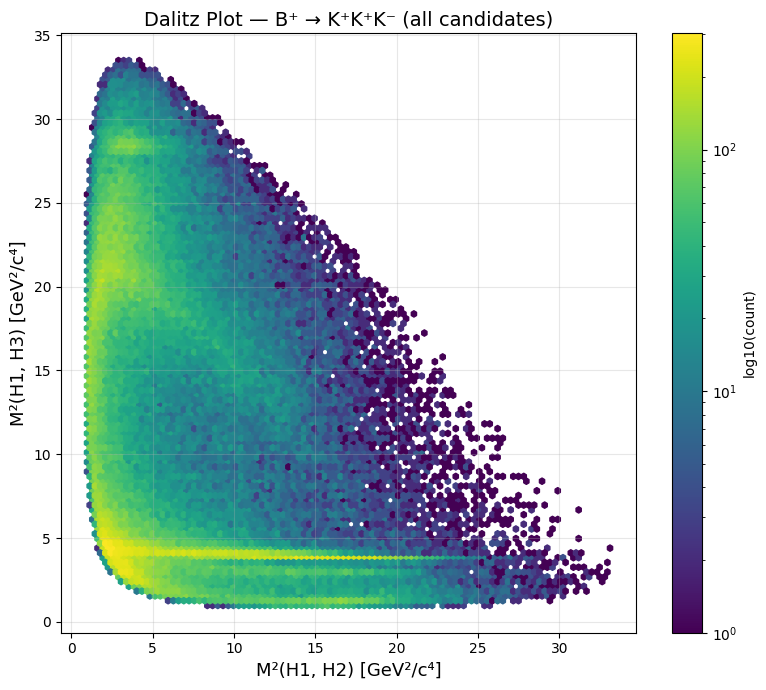

In [68]:
#Then, ensuring you're still taking the data after the selection, make a Dalitz plot. This is a 2-D scatter plot (use e.g. TH2F to make the plot where we used TH1F before)
#Choose an appropriate binning in your scatter

# Basic Dalitz plot — M^2(H1,H2) vs M^2(H1,H3) after preselection.
# A Dalitz plot shows the two independent 2-body invariant masses squared on each axis.
# Bands of high density indicate intermediate resonances (e.g. phi(1020), K*(892))

# Work in units of MeV^2/c^4 — square the invariant masses for the Dalitz plot
M12_sq = M_12[mask]**2
M13_sq = M_13[mask]**2
M23_sq = M_23[mask]**2

fig, ax = plt.subplots(figsize=(8, 7))

# Use hexbin for density — scatter would again be unreadable with ~180k events
hb = ax.hexbin(M12_sq / 1e6, M13_sq / 1e6,   # convert to GeV^2 for readability
               gridsize=100, cmap="viridis", bins="log")

fig.colorbar(hb, ax=ax, label="log10(count)")

ax.set_xlabel("M²(H1, H2) [GeV²/c⁴]", fontsize=13)
ax.set_ylabel("M²(H1, H3) [GeV²/c⁴]", fontsize=13)
ax.set_title("Dalitz Plot — B⁺ → K⁺K⁺K⁻ (all candidates)", fontsize=14)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

We can further improve our plot, since two sets of particles on each axis are exactly the same (one positive Kaon, one negative Kaon). So we can plot the maximum of the two values on one axis and the minimum on the other. We can use a quick numpy check and then plot those values.

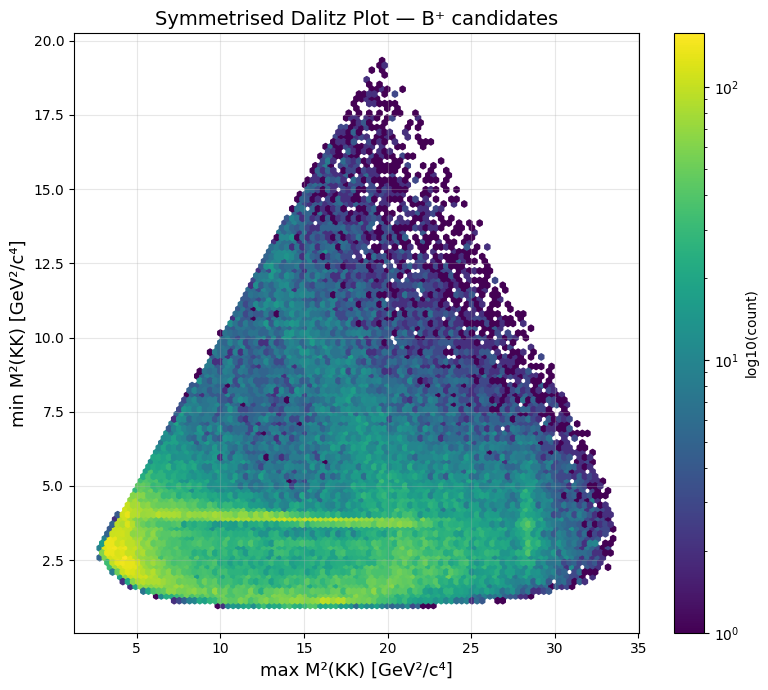

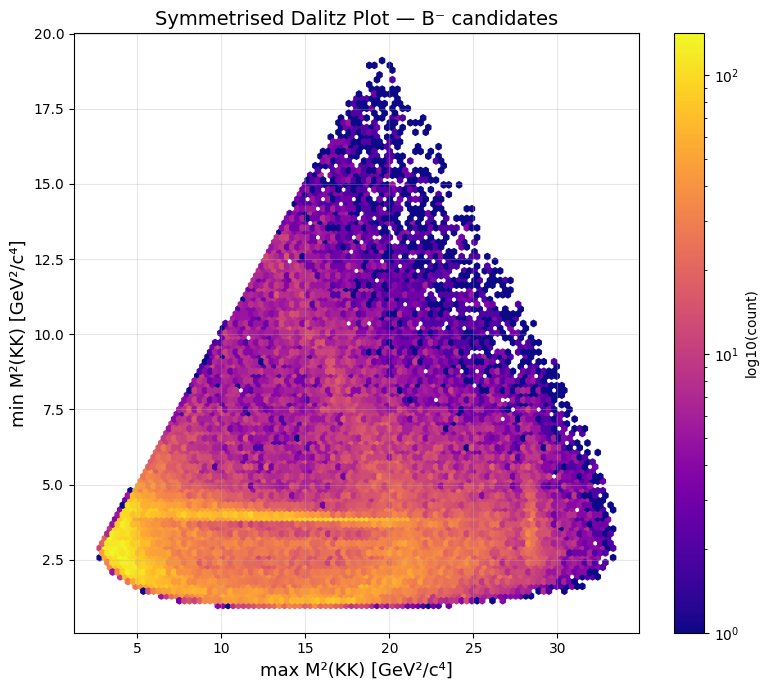

In [69]:
#Make the revised Dalitz plot here for B+ and B- mesons seperately

# Since the two sets of particles on each axis are the same (one K+, one K-),
# use numpy to plot max of the two values on one axis and min on the other.
# This symmetrised Dalitz plot removes the arbitrary labelling of identical particles.

def symmetrised_dalitz(mass_array, charge_mask, title, cmap):
    """
    Make a symmetrised Dalitz plot for a given B+ or B- sample.
    Plots max(M²_12, M²_13) vs min(M²_12, M²_13) to remove particle labelling ambiguity.
    """
    # Apply both the preselection mask and the B+/B- charge mask
    combined_mask = charge_mask

    m12 = M_12[combined_mask]**2 / 1e6   # GeV^2
    m13 = M_13[combined_mask]**2 / 1e6
    m23 = M_23[combined_mask]**2 / 1e6

    # Symmetrise: use max and min of the two same-sign pair masses
    m_max = np.maximum(m12, m13)
    m_min = np.minimum(m12, m13)

    fig, ax = plt.subplots(figsize=(8, 7))

    hb = ax.hexbin(m_max, m_min, gridsize=100, cmap=cmap, bins="log")
    fig.colorbar(hb, ax=ax, label="log10(count)")

    ax.set_xlabel("max M²(KK) [GeV²/c⁴]", fontsize=13)
    ax.set_ylabel("min M²(KK) [GeV²/c⁴]", fontsize=13)
    ax.set_title(title, fontsize=14)
    ax.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    return m_max, m_min

# B+ candidates (total charge = +1)
m_max_plus, m_min_plus = symmetrised_dalitz(
    mass_B_corrected, Bplus_mask,
    "Symmetrised Dalitz Plot — B⁺ candidates", "viridis"
)

# B- candidates (total charge = -1)
m_max_minus, m_min_minus = symmetrised_dalitz(
    mass_B_corrected, Bminus_mask,
    "Symmetrised Dalitz Plot — B⁻ candidates", "plasma"
)

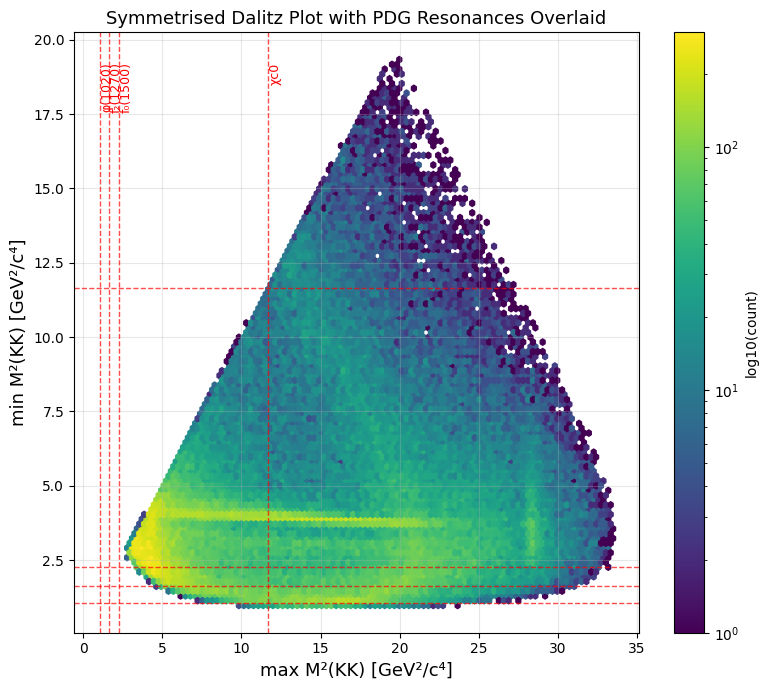

In [70]:
#Where we have a higher density of points (or a bigger value in the bin) this is an indication of an intermediate resonance
#Check out the possible resonances you have found in the PDG (http://pdg.lbl.gov/2020/tables/contents_tables.html)

# Where there are bands or clusters of high density in the Dalitz plot, there is an intermediate resonance — the B meson decays via an intermediate particle rather than directly to three kaons.

# Known resonances to look for in the KK invariant mass spectrum (from PDG):
# phi(1020)  : M ~ 1020 MeV/c^2  -> M^2 ~ 1.04 GeV^2/c^4  (very prominent in B->KKK)
# f2(1270)   : M ~ 1275 MeV/c^2  -> M^2 ~ 1.63 GeV^2/c^4
# f0(1500)   : M ~ 1505 MeV/c^2  -> M^2 ~ 2.26 GeV^2/c^4
# chi_c0     : M ~ 3415 MeV/c^2  -> M^2 ~ 11.66 GeV^2/c^4

resonances = {
    "φ(1020)"  : (1020  / 1000)**2,   # GeV^2
    "f₂(1270)" : (1275  / 1000)**2,
    "f₀(1500)" : (1505  / 1000)**2,
    "χc0"      : (3415  / 1000)**2,
}

fig, ax = plt.subplots(figsize=(8, 7))

# Plot all candidates together for maximum statistics
m12_all = M_12[mask]**2 / 1e6
m13_all = M_13[mask]**2 / 1e6
m_max_all = np.maximum(m12_all, m13_all)
m_min_all = np.minimum(m12_all, m13_all)

hb = ax.hexbin(m_max_all, m_min_all, gridsize=100, cmap="viridis", bins="log")
fig.colorbar(hb, ax=ax, label="log10(count)")

# Overlay known resonance masses as reference lines
for name, m2 in resonances.items():
    ax.axvline(x=m2, color="red",    linestyle="--", linewidth=1, alpha=0.7)
    ax.axhline(y=m2, color="red",    linestyle="--", linewidth=1, alpha=0.7)
    ax.text(m2 + 0.05, ax.get_ylim()[1] * 0.95, name,
            color="red", fontsize=9, rotation=90, va="top")

ax.set_xlabel("max M²(KK) [GeV²/c⁴]", fontsize=13)
ax.set_ylabel("min M²(KK) [GeV²/c⁴]", fontsize=13)
ax.set_title("Symmetrised Dalitz Plot with PDG Resonances Overlaid", fontsize=13)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
